# Relax and Hold Steady - Poisson Equation

## Notes:

### Derivation based on Notebook 1 math
 * going to start with the homogenous case of the poisson equation, laplace's equation $\nabla^{2}=0$
* use p to denote that this is using potential theory: $$\frac{\partial^{2}p}{\partial x^{2}}+\frac{\partial^{2}p}{\partial y^{2}}=0$$

* Before we solve out the laplace equation, let's take a look at the math of the poisson equation, with no assumptions. Doing this gives us a fuller picture of the discretization scheme and what assumptions make valid sense and how they impact the full discretized solutions.
    * in order to solve out the poisson equation, we will use $p(x,y)$ to solve out $\nabla^{2} p(x,y) = f(x,y)$, with the only assumption made is that both $p(x,y)$ and $f(x,y)$ exist in the shared domain $\Omega$.
    * therefore, the problem we are solving for first, before any assumptions are made, is: $\frac{\partial^{2}p}{\partial x^{2}}+\frac{\partial^{2}p}{\partial y^{2}}=f(x,y)$
        * we can solve out $\frac{\partial^{2} p}{\partial x^{2}}$ with a central space scheme with $i \implies x$ and $j \implies y$:
        $$\begin{gather}
        p_{i+1,j} = p_{i,j} + \left.\Delta x \frac{\partial p}{\partial x}\right|_{i,j} + \left.\frac{\Delta x^{2}}{2} \frac{\partial^{2} p}{\partial x^{2}}\right|_{i,j} + \left.\frac{\Delta x^{3}}{6} \frac{\partial^{3} p}{\partial x^{3}}\right|_{i,j} + \left.\frac{\Delta x^{4}}{24} \frac{\partial^{4} p}{\partial x^{4}}\right|_{i,j}\tag{1}\\
        p_{i-1,j} = p_{i,j} - \left.\Delta x \frac{\partial p}{\partial x}\right|_{i,j} + \left.\frac{\Delta x^{2}}{2} \frac{\partial^{2} p}{\partial x^{2}}\right|_{i,j} - \left.\frac{\Delta x^{3}}{6} \frac{\partial^{3} p}{\partial x^{3}}\right|_{i,j} + \left.\frac{\Delta x^{4}}{24} \frac{\partial^{4} p}{\partial x^{4}}\right|_{i,j}\tag{2}
        \end{gather}$$ 
        summing Equation (1) and Equation (2) together, we get:
        $$\begin{gather}
        p_{i+1,j} + p_{i-1,j} = 2p_{i,j} + \left.\Delta x^{2} \frac{\partial^{2} p}{\partial x^{2}}\right|_{i,j} + \left.\frac{\Delta x^{4}}{12} \frac{\partial^{4} p}{\partial x^{4}}\right|_{i,j}\tag{3}\\
        \frac{p_{i+1,j} + p_{i-1,j} - 2p_{i,j}}{\Delta x^{2}} = \left.\frac{\partial^{2} p}{\partial x^{2}}\right|_{i,j} + \left.\frac{\Delta x^{2}}{12} \frac{\partial^{4} p}{\partial x^{4}}\right|_{i,j}\tag{4}
        \end{gather}$$
        Allowing $\left.\frac{\Delta x^{2}}{12} \frac{\partial^{4} p}{\partial x^{4}}\right|_{i,j}\equiv O(\Delta x^{2})$, which approximates the order of the error, we can solve out $\frac{\partial^{2} p}{\partial x^{2}}$ into it's final form: 
        $$
        \frac{p_{i+1,j} + p_{i-1,j} - 2p_{i,j}}{\Delta x^{2}} - O(\Delta x^{2}) = \left.\frac{\partial^{2} p}{\partial x^{2}}\right|_{i,j}\tag{5}
        $$
        * Similarly, we can solve out $\frac{\partial^{2} p}{\partial y^{2}}$ with a central space scheme:
        $$\begin{gather}
        p_{i,j+1} = p_{i,j} + \left.\Delta y \frac{\partial p}{\partial y}\right|_{i,j} + \left.\frac{\Delta y^{2}}{2} \frac{\partial^{2} p}{\partial y^{2}}\right|_{i,j} + \left.\frac{\Delta y^{3}}{6} \frac{\partial^{3} p}{\partial y^{3}}\right|_{i,j} + \left.\frac{\Delta y^{4}}{24} \frac{\partial^{4} p}{\partial y^{4}}\right|_{i,j}\tag{6}\\
        p_{i,j-1} = p_{i,j} - \left.\Delta y \frac{\partial p}{\partial y}\right|_{i,j} + \left.\frac{\Delta y^{2}}{2} \frac{\partial^{2} p}{\partial y^{2}}\right|_{i,j} - \left.\frac{\Delta y^{3}}{6} \frac{\partial^{3} p}{\partial y^{3}}\right|_{i,j} + \left.\frac{\Delta y^{4}}{24} \frac{\partial^{4} p}{\partial y^{4}}\right|_{i,j}\tag{7}
        \end{gather}$$ 
        summing Equation (6) and Equation (7) together, we get:
        $$\begin{gather}
        p_{i,j+1} + p_{i,j-1} = 2p_{i,j} + \left.\Delta y^{2} \frac{\partial^{2} p}{\partial y^{2}}\right|_{i,j} + \left.\frac{\Delta y^{4}}{12} \frac{\partial^{4} p}{\partial y^{4}}\right|_{i,j}\tag{8}\\
        \frac{p_{i,j+1} + p_{i,j-1} - 2p_{i,j}}{\Delta y^{2}} = \left.\frac{\partial^{2} p}{\partial y^{2}}\right|_{i,j} + \left.\frac{\Delta y^{2}}{12} \frac{\partial^{4} p}{\partial y^{4}}\right|_{i,j}\tag{9}
        \end{gather}$$
        Allowing $\left.\frac{\Delta y^{2}}{12} \frac{\partial^{4} p}{\partial y^{4}}\right|_{i,j}\equiv O(\Delta y^{2})$, which approximates the order of the error, we can solve out $\frac{\partial^{2} p}{\partial y^{2}}$ into it's final form: 
        $$
        \frac{p_{i,j+1} + p_{i,j-1} - 2p_{i,j}}{\Delta y^{2}} - O(\Delta y^{2}) = \left.\frac{\partial^{2} p}{\partial y^{2}}\right|_{i,j}\tag{10}
        $$

    * From Equation (5) and Equation (10), we can further expand and simplify the poisson equation to:
    $$\begin{gather}
    \frac{p_{i+1,j} + p_{i-1,j} - 2p_{i,j}}{\Delta x^{2}} - O(\Delta x^{2}) + \frac{p_{i,j+1} + p_{i,j-1} - 2p_{i,j}}{\Delta y^{2}} - O(\Delta y^{2}) = f(x,y)\tag{11}\\
    \frac{p_{i+1,j} + p_{i-1,j} - 2p_{i,j}}{\Delta x^{2}} + \frac{p_{i,j+1} + p_{i,j-1} - 2p_{i,j}}{\Delta y^{2}} = f(x,y) + O(\Delta x^{2}) + O(\Delta y^{2})\tag{12}\\
    \Delta x^{2}(p_{i,j+1} + p_{i,j-1} - 2p_{i,j}) + \Delta y^{2}(p_{i+1,j} + p_{i-1,j} - 2p_{i,j}) = \Delta x^{2}\Delta y^{2}[f(x,y) + O(\Delta x^{2}) + O(\Delta y^{2})]\tag{13}\\
    \Delta x^{2}[p_{i,j+1} + p_{i,j-1}] + \Delta y^{2}[p_{i+1,j} + p_{i-1,j}] - 2p_{i,j}[\Delta x^{2}+\Delta y^{2}] = \Delta x^{2}\Delta y^{2}[f(x,y) + O(\Delta x^{2}) + O(\Delta y^{2})]\tag{14}\\
    p_{i,j} = \frac{\Delta x^{2}[p_{i,j+1} + p_{i,j-1}] + \Delta y^{2}[p_{i+1,j} + p_{i-1,j}]-\Delta x^{2}\Delta y^{2}[f(x,y) + O(\Delta x^{2}) + O(\Delta y^{2})]}{2[\Delta x^{2}+\Delta y^{2}]}\tag{15}\\
    \implies p^{k+1}_{i,j} = \frac{\Delta x^{2}[p^{k}_{i,j+1} + p^{k}_{i,j-1}] + \Delta y^{2}[p^{k}_{i+1,j} + p^{k}_{i-1,j}]-\Delta x^{2}\Delta y^{2}[f(x,y)^{k}_{i,j} + O(\Delta x^{2}) + O(\Delta y^{2})]}{2[\Delta x^{2}+\Delta y^{2}]}\tag{15}
    \end{gather}$$
    
   

Number of Jacobi iterations: 3125
0.000449626353536
Number of Jacobi iterations: 249
Number of Jacobi iterations: 892
Number of Jacobi iterations: 3125
Number of Jacobi iterations: 10708


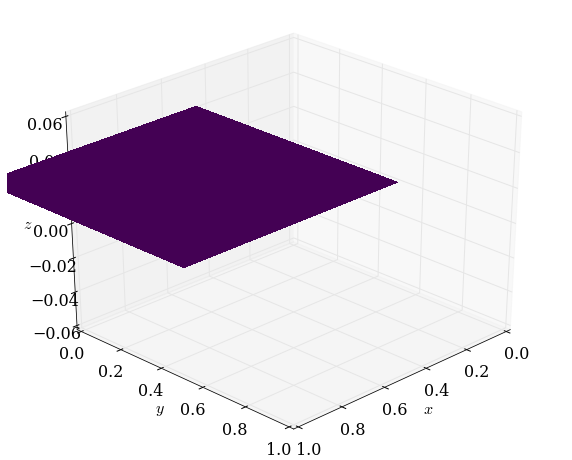

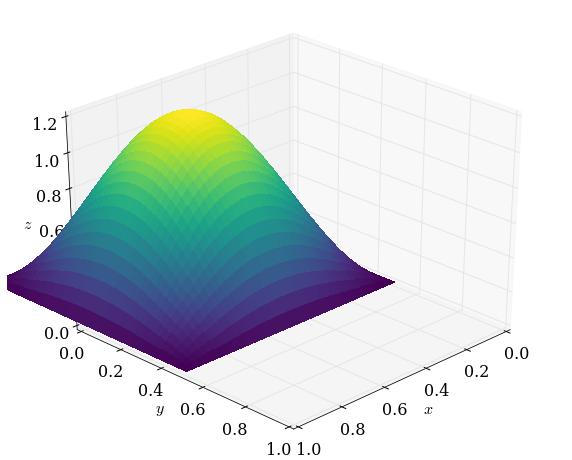

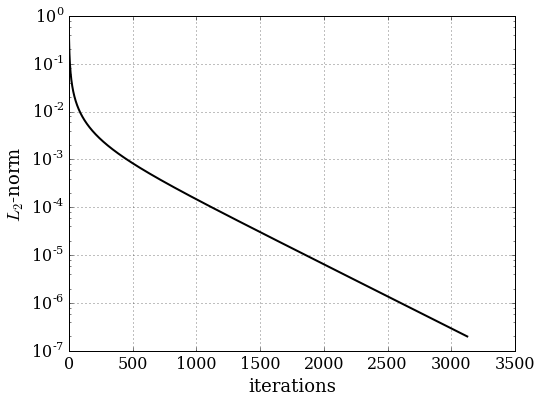

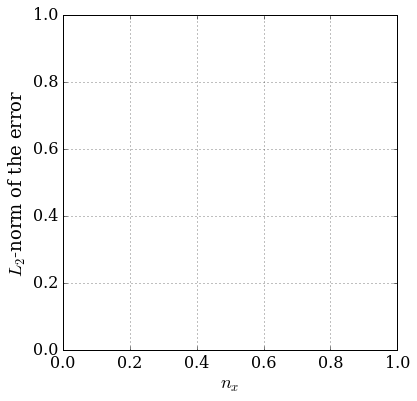

In [10]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot, cm
from math import pi
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

# Parameters
nx = 41
ny = 41
xmin = 0
xmax = 1
ymin = -0.5
ymax = 0.5

l2_target = 2e-7

def poisson_IG(nx, ny, xmax, xmin, ymax, ymin):
    '''Initialize the Poisson problem initial guess and other variables
    Parameters:
    ----------
    nx : int
        number of mesh points in x
    ny : int
        number of mesh points in y
    xmax: float
        maximum value of x in mesh
    xmin: float
        minimum value of x in mesh
    ymax: float
        maximum value of y in mesh
    ymin: float
        minimum value of y in mesh
    
    Returns:
    -------
    X  : 2D array of floats
        X-position of mesh
    Y  : 2D array of floats
        Y-position of mesh
    p_i: 2D array of floats
        initial guess of p
    b  : 2D array of floats
        forcing function
    dx : float
        mesh size in x direction
    dy : float
        mesh size in y direction
    '''

    dx = (xmax-xmin)/(nx-1)
    dy = (ymax-ymin)/(ny-1)

    # Mesh
    x  = numpy.linspace(xmin,xmax,nx)
    y  = numpy.linspace(ymin,ymax,ny)
    X,Y = numpy.meshgrid(x,y)

    # Source
    L = xmax-xmin
    b = -2*(pi/L)**2*numpy.sin(pi*X/L)*numpy.cos(pi*Y/L)

    # Initialize
    p_i  = numpy.zeros((ny,nx))

    return X, Y, x, y, p_i, b, dx, dy, L

# Create error method for calculations
def error(final, iteration):
    return numpy.sqrt(numpy.sum((final - iteration)**2)/numpy.sum(iteration**2))

def poisson_2d(p, b, dx, dy, l2_target):
    '''Performs Jacobi relaxation
    
    Parameters:
    ----------
    p : 2D array of floats
        Initial guess
    b : 2D array of floats
        Source term
    dx: float
        Mesh spacing in x direction
    dy: float
        Mesh spacing in y direction
    l2_target: float
        Target difference between two consecutive iterates
    
    Returns:
    -------
    p: 2D array of float
        Distribution after relaxation
    '''

    l2_norm = 1
    iterations = 0
    l2_conv = []
    
    while l2_norm > l2_target:

        pd = p.copy()

        p[1:-1,1:-1] = 1/(2*(dx**2 + dy**2)) * \
                        ((pd[1:-1,2:]+pd[1:-1,:-2])*dy**2 +\
                        (pd[2:,1:-1] + pd[:-2,1:-1])*dx**2 -\
                         b[1:-1,1:-1]*dx**2*dy**2)
    
        # BCs are automatically enforced
        
        l2_norm = error(pd,p)
        iterations += 1
        l2_conv.append(l2_norm)
    
    print('Number of Jacobi iterations: {0:d}'.format(iterations))
    return p, l2_conv  

def p_analytical(X,Y,L):
    ''' Computes analytical solution to Poisson problem
    Parameters:
    ----------
    X: 2D array of float
        Mesh with x components
    Y: 2D array of float
        Mesh with y components
    L: float
        Size of domain
    Returns:
    -------
    Analytical solution
    '''
    return numpy.sin(X*pi/L)*numpy.cos(Y*pi/L)

# Creating the plot3d method
def plot3d(x, y, p):
    fig = pyplot.figure(figsize=(10,8), dpi=1000)
    ax = fig.gca(projection='3d')
    X,Y = numpy.meshgrid(x,y)
    ax.plot_surface(X,Y,p[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False) # don't need to save this surface

    ax.set_xlim(0,1) # Domain given in problem
    ax.set_ylim(0,1) # Range given in problem
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    ax.view_init(30,45)
    
X, Y, x, y, p_i, b, dx, dy, L = poisson_IG(nx, ny, xmax, xmin, ymax, ymin)
plot3d(x, y, p_i)
p, l2_conv = poisson_2d(p_i.copy(), b, dx, dy, l2_target)
plot3d(x,y,p)
p_an = p_analytical(X,Y,L)
print(error(p,p_an))

pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'iterations', fontsize=18)
pyplot.ylabel(r'$L_2$-norm', fontsize=18)
pyplot.semilogy(numpy.arange(len(l2_conv)), l2_conv, lw=2, color='k');


nx_values = [11,21,41,81]

err = numpy.zeros_like(nx_values, dtype=numpy.float)

for i, nx in enumerate(nx_values):
    
    ny = nx
    
    X, Y, c, y, p_i, b, dx, dy, L = poisson_IG(nx, ny, xmax, xmin, ymax, ymin)
    p, l2_conv = poisson_2d(p_i.copy(), b, dx, dy, l2_target)

    p_an = p_analytical(X,Y,L)
    
    err[i] = error(p,p_an)
    
pyplot.figure(figsize=(6,6))
pyplot.grid(True)
pyplot.xlabel(r'$n_x$', fontsize=18)
pyplot.ylabel(r'$L_2$-norm of the error', fontsize=18)
#pyplot.loglog(nx_values, error, color='k', ls='--', lw=2, marker='o')
pyplot.axis('equal');
